In [3]:
import pandas as pd

df = pd.read_csv('C:/Users/91990/Desktop/Tableau_Project/Dataset/data.csv')
df.head()


,title,type,genres,releaseYear,imdbId,imdbAverageRating,imdbNumVotes,availableCountries
0,Ariel,movie,"Comedy, Crime, Romance",1988.0,tt0094675,7.4,9077.0,NaN
1,Shadows in Paradise,movie,"Comedy, Drama, Music",1986.0,tt0092149,7.4,7885.0,NaN
2,Forrest Gump,movie,"Drama, Romance",1994.0,tt0109830,8.8,2365858.0,NaN
3,American Beauty,movie,Drama,1999.0,tt0169547,8.3,1245164.0,NaN
4,The Fifth Element,movie,"Action, Adventure, Sci-Fi",1997.0,tt0119116,7.6,524910.0,NaN


In [5]:
!pip install seaborn

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
file_path = r"C:\Users\91990\Desktop\Tableau_Project\Dataset\data.csv"
df = pd.read_csv(file_path)

In [11]:
print(df.shape)

(21316, 8)


In [13]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21316 entries, 0 to 21315
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               20603 non-null  object 
 1   type                21316 non-null  object 
 2   genres              20944 non-null  object 
 3   releaseYear         21275 non-null  float64
 4   imdbId              19712 non-null  object 
 5   imdbAverageRating   19521 non-null  float64
 6   imdbNumVotes        19521 non-null  float64
 7   availableCountries  161 non-null    object 
dtypes: float64(3), object(5)
memory usage: 1.3+ MB
None


In [15]:
print(df.isnull().sum())

title                   713
type                      0
genres                  372
releaseYear              41
imdbId                 1604
imdbAverageRating      1795
imdbNumVotes           1795
availableCountries    21155
dtype: int64


In [17]:
df=df.drop(columns=['availableCountries'])

In [19]:
df=df.dropna(subset=['releaseYear', 'imdbAverageRating', 'genres'])

In [21]:
print(df.isnull().sum())

title                0
type                 0
genres               0
releaseYear          0
imdbId               0
imdbAverageRating    0
imdbNumVotes         0
dtype: int64


In [23]:
df['genres'] = df['genres'].str.split(',')
df = df.explode('genres')
df['genres'] = df['genres'].str.strip()

In [25]:
# Save the cleaned dataset
output_path = r"C:\Users\91990\Desktop\Tableau_Project\Dataset\cleaned_imdb_data.csv"
df.to_csv(output_path, index=False)
print("✅ Cleaned data saved to:", output_path)


✅ Cleaned data saved to: C:\Users\91990\Desktop\Tableau_Project\Dataset\cleaned_imdb_data.csv


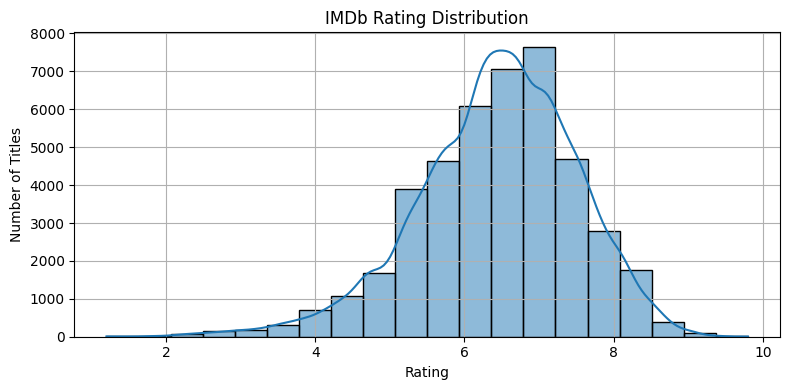

In [27]:
# Plot 1: IMDb Rating Distribution
plt.figure(figsize=(8, 4))
sns.histplot(df['imdbAverageRating'], bins=20, kde=True)
plt.title("IMDb Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Number of Titles")
plt.grid(True)
plt.tight_layout()
plt.show()

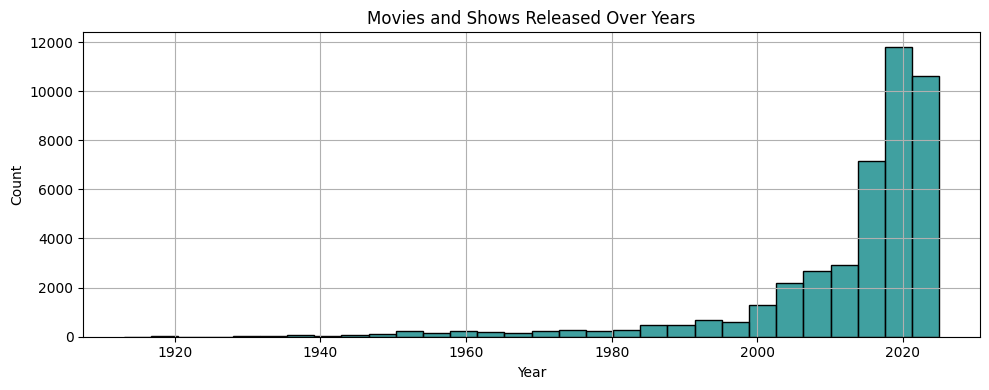

In [29]:
# Plot 2: Release Year Trend
plt.figure(figsize=(10, 4))
sns.histplot(df['releaseYear'], bins=30, color='teal')
plt.title("Movies and Shows Released Over Years")
plt.xlabel("Year")
plt.ylabel("Count")
plt.grid(True)
plt.tight_layout()
plt.show()